In [3]:
import os
# Use async gpu memory allocation
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"

In [4]:
import tensorflow as tf
import tf_keras as keras
from tf_keras import layers, losses, optimizers, metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

### Read and analize the dataset

In [9]:
df = pd.read_csv('../datasets/aqi/generated/combined_aqi_bulk_modified.csv')

In [10]:
df.head()

,datetime,o3 (ppm),pm2.5 (µg/m³)
0,2016-11-09 23:00:00+06:00,0.001,61.7
1,2016-11-10 00:00:00+06:00,0.001,67.8
2,2016-11-10 01:00:00+06:00,0.001,109.9
3,2016-11-10 02:00:00+06:00,0.001,127.4
4,2016-11-10 03:00:00+06:00,0.001,122.2


Copy the dataframe

In [11]:
df_copy = df.copy()

Extract the datetime column for visualization

In [12]:
date_time = pd.to_datetime(df_copy.pop('datetime'), format='ISO8601')

Visualize the data distribution

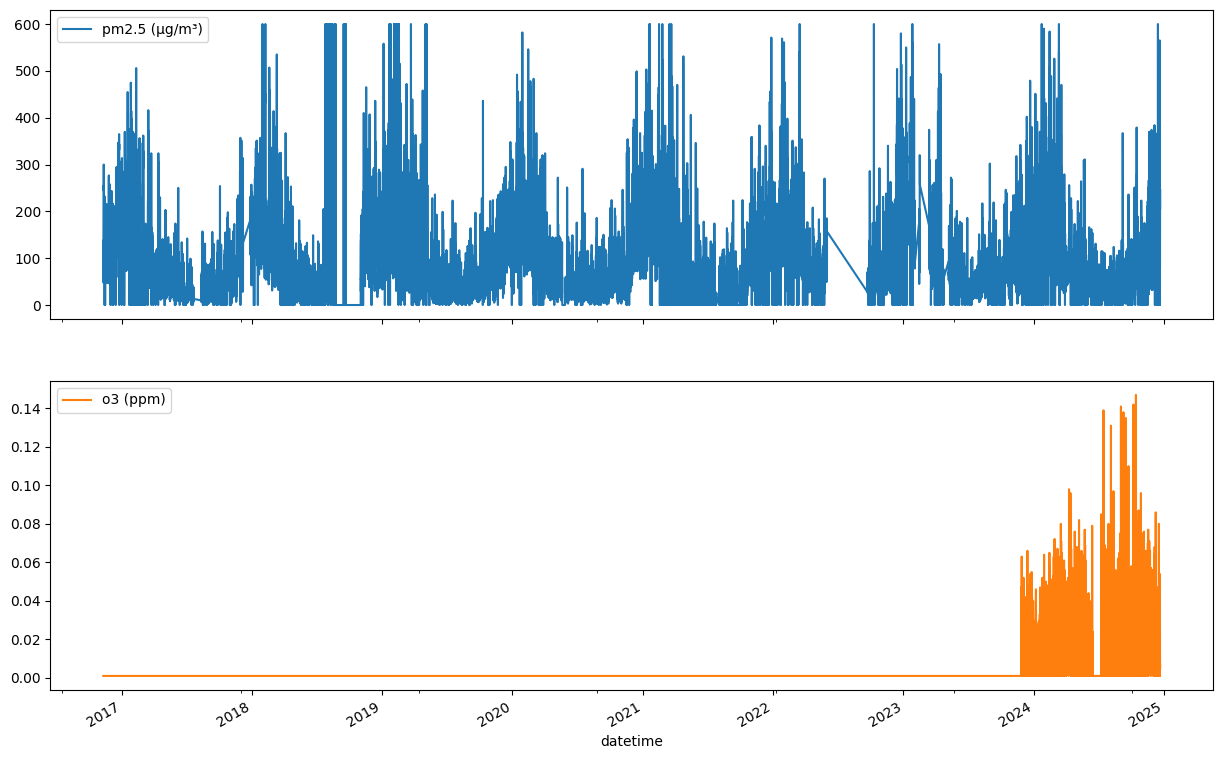

In [56]:
plot_cols = ['pm2.5 (µg/m³)', "o3 (ppm)",]
plot_features = df_copy[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize=(15, 10))

Visualize the frequency domains of the pm2.5 parameter

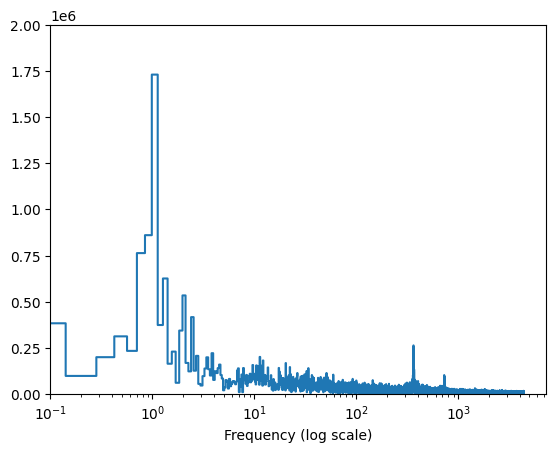

In [ ]:
fft = tf.signal.rfft(df_copy['pm2.5 (µg/m³)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_copy['pm2.5 (µg/m³)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 2000000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [41]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)